In [ ]:
from PIL import Image
from pathlib import Path
import numpy as np

if __name__ == '__main__':
    fe = FeatureExtractor()

    for img_path in sorted(Path("/content/drive/MyDrive/images").glob("*.jpg")):
        feature = fe.extract(img=Image.open(img_path))
        feature_path = Path("/content/drive/MyDrive/features") / (img_path.stem + ".npy")
        np.save(feature_path, feature)

In [2]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 815.1 kB/s eta 0:00:00


In [3]:
from keras_preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

class FeatureExtractor:
    def __init__(self):
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, img):
        img = img.resize((224, 224))  # VGG must take a 224x224 img as an input
        img = img.convert('RGB')  # Make sure img is color
        x = image.img_to_array(img)  # To np.array. Height x Width x Channel. dtype=float32
        x = np.expand_dims(x, axis=0)  # (H, W, C)->(1, H, W, C), where the first elem is the number of img
        x = preprocess_input(x)  # Subtracting avg values for each pixel
        feature = self.model.predict(x)[0]  # (1, 4096) -> (4096, )
        return feature / np.linalg.norm(feature)  # Normalize
import numpy as np
from PIL import Image
#from datetime import datetime
from pathlib import Path
import cv2
# Read image features
fe = FeatureExtractor()
features = []
img_paths = []
for feature_path in Path("/content/drive/MyDrive/features").glob("*.npy"):
    features.append(np.load(feature_path))
    img_paths.append(Path("/content/drive/MyDrive/images") / (feature_path.stem + ".jpg"))
features = np.array(features)


553467096/553467096 [==============================] - 8s 0us/step


In [4]:
import cv2
from google.colab.patches import cv2_imshow
def search(path):
  img = Image.open(path)
  img.save(path)
  # Run search
  query = fe.extract(img)
  dists = np.linalg.norm(features-query, axis=1)  # L2 distances to features
  ids = np.argsort(dists)[:8]  # Top 8 results
  scores = [(dists[id], img_paths[id]) for id in ids]
  #print(scores)
  from google.colab.patches import cv2_imshow
  query=cv2.imread(path)
  cv2_imshow(query)
  print("OUTPUT")
  for id in ids:
    output=cv2.imread(str(img_paths[id]))
    #print(img_paths[id])
    cv2_imshow(output)


In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image
import nltk
nltk.download('punkt')
import pandas as pd
from nltk.corpus import stopwords
import os
from sklearn.metrics.pairwise import cosine_similarity
from google.colab.patches import cv2_imshow
import cv2


# Preprocess the textual descriptions
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens if t.isalpha()]
    tokens = [t for t in tokens if t not in stop_words]
    tokens = ' '.join(tokens)
    #return correction(tokens).
    return tokens

def text_to_image(input_text):
  path_to_images = '/content/drive/MyDrive/domain_project'
  images_files = [os.path.join(path_to_images, f) for f in os.listdir(path_to_images) if f.endswith('.jpg')]
  data=pd.read_excel("/content/drive/MyDrive/textdomain.xlsx")
  image_files=data['images'].tolist()
  text = data['text'].tolist()
  input_text = preprocess_text(input_text)
  i=0
  while i<len(text):
    if input_text==text[i]:
      img=cv2.imread(image_files[i])
      cv2_imshow(img)
    i=i+1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 20.6 MB/s eta 0:00:00


In [8]:
import easyocr
import cv2
import matplotlib.pyplot as plt
def text_extract(path):
  reader = easyocr.Reader(['en'])
  result = reader.readtext(path)
  img = cv2.imread(path)
  spacer = 100
  #font = cv2.FONT_HERSHEY_SIMPLEX
  for detection in result:
      top_left = tuple(detection[0][0])
      bottom_right = tuple(detection[0][2])
      text = detection[1]
      img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
      #img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
      spacer+=15

  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.show()

  if len(result)>=1:
    i=0
    while i<len(result):
      print(result[i][-2])
      i=i+1

enter image for searching related images or text for searching text related image or extract to extract text from the image :text
enter bike/pizza/banana/elephant/parrot: parrot


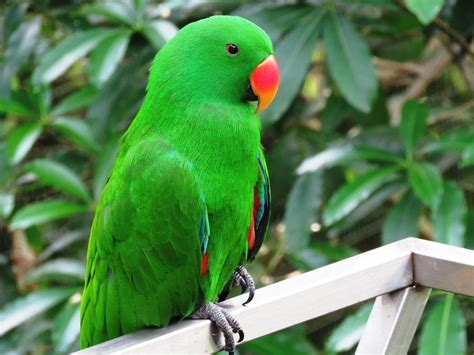

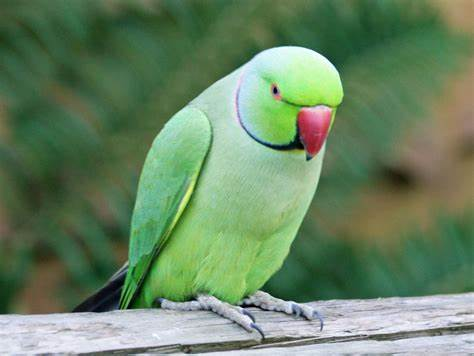

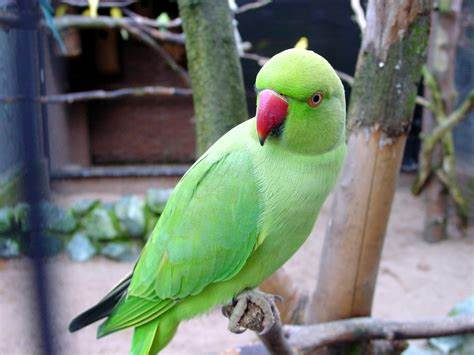

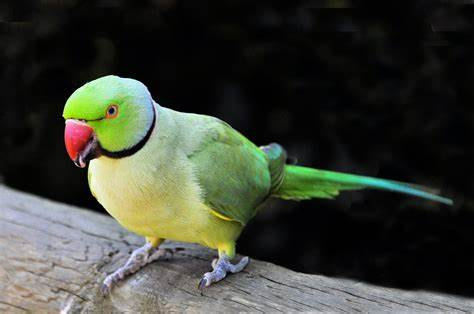

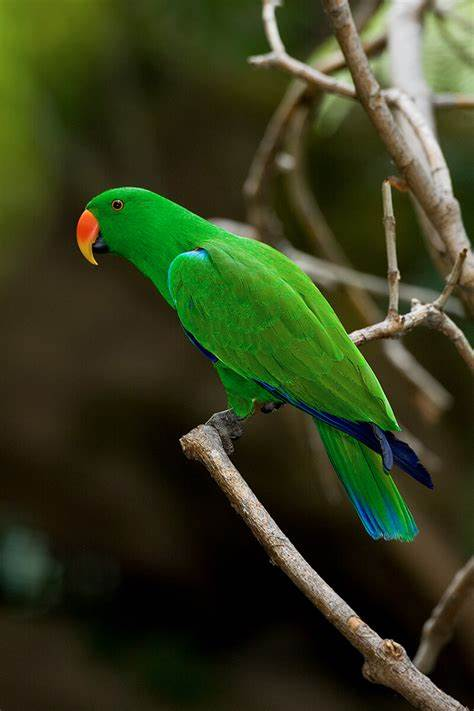

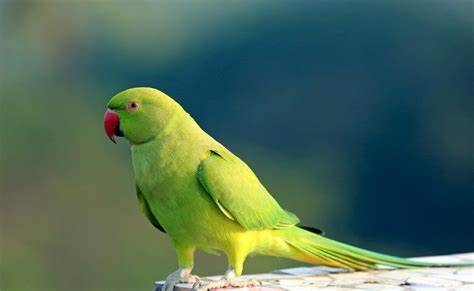

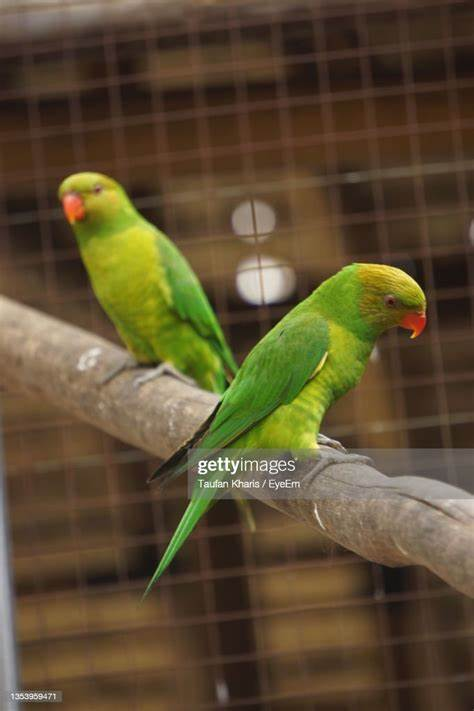

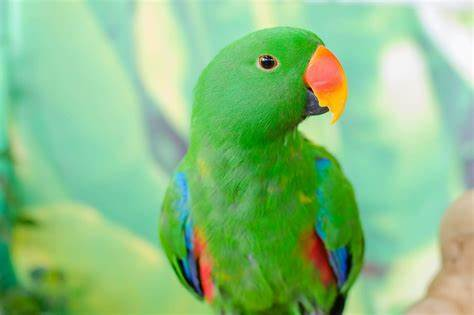

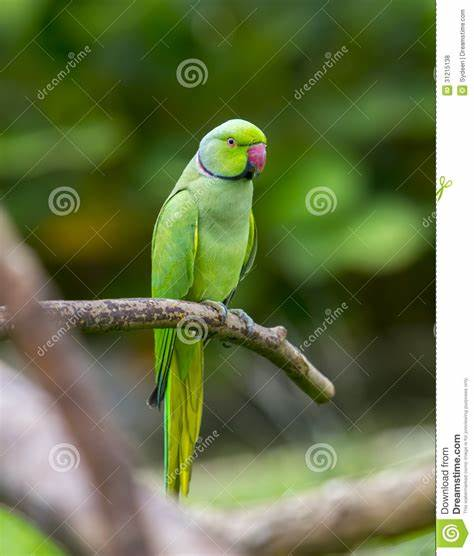

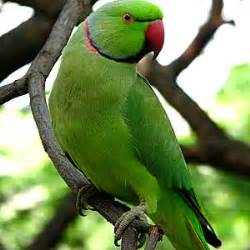

In [9]:
#example path for image = "/content/drive/MyDrive/bike.jpg"
#example path for extract = "/content/drive/MyDrive/text.jpg"
#input_text = input('enter bike/pizza/banana/elephant/parrot:')

userchoice=input("enter image for searching related images or text for searching text related image or extract to extract text from the image :").lower()
if userchoice=='image' or userchoice=='1':
  path=input('enter path of image to be searched: ')
  search(path)
elif userchoice=='text' or userchoice=='2':
  input_text = input('enter bike/pizza/banana/elephant/parrot: ')
  text_to_image(input_text)
elif userchoice=='extract' or userchoice=='3':
  path = input('enter path of image from which text should be extracted: ')
  text_extract(path)
else:
  print('enter image for searching related images or text for searching text related image or extract to extract text from the image !')
